<a href="https://colab.research.google.com/github/Jallen101181/CS4410/blob/main/CS4410_Homework_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joseph Brandon Allen CS4410 Homework 7-2 16.4

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set(font_scale=2)

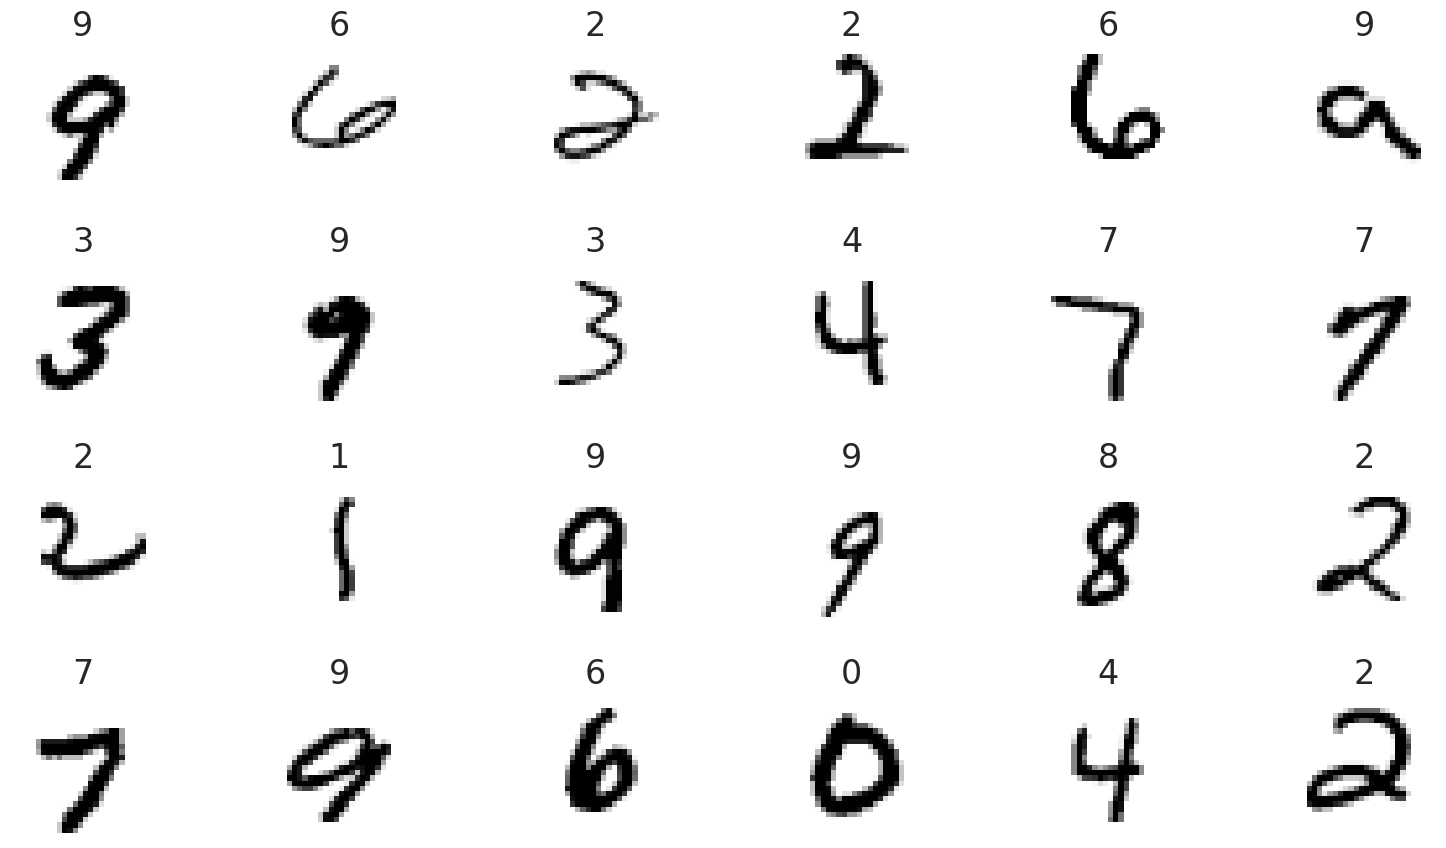

In [7]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(target)
plt.tight_layout()

In [8]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [9]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [10]:
X_train = X_train.astype('float32') / 255

In [11]:
X_test = X_test.astype('float32') / 255

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train)

In [14]:
y_test = to_categorical(y_test)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
cnn = Sequential()

In [17]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [18]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
 input_shape=(28, 28, 1)))

In [19]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [21]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
cnn.add(Flatten())

New Dense Layer with 4096 Neurons

In [23]:
cnn.add(Dense(units=4096, activation='relu'))

In [24]:
cnn.add(Dense(units=128, activation='relu'))

In [25]:
cnn.add(Dense(units=10, activation='softmax'))

In [26]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 4096)              1

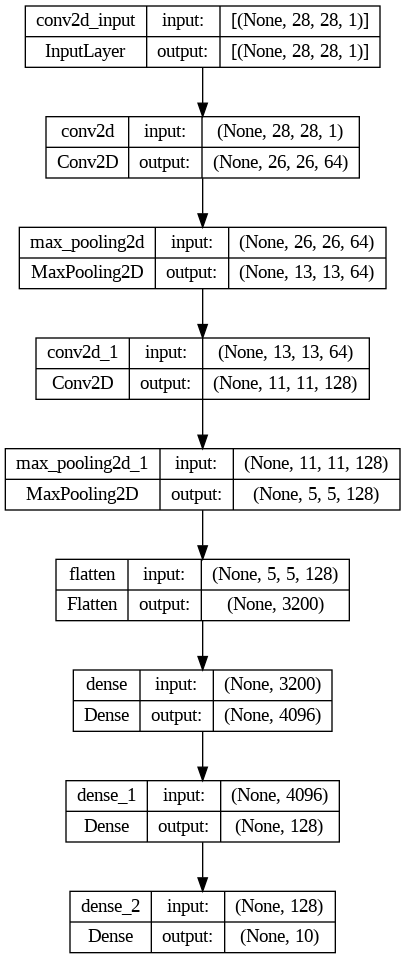

In [27]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
  show_layer_names=True)
Image(filename='convnet.png')

In [28]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [29]:
y_train.shape

(60000, 10)

In [30]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 457s 540ms/step - loss: 0.1176 - accuracy: 0.9631 - val_loss: 0.0445 - val_accuracy: 0.9878
Epoch 2/5
844/844 [==============================] - 450s 533ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 3/5
844/844 [==============================] - 451s 535ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0421 - val_accuracy: 0.9882
Epoch 4/5
844/844 [==============================] - 449s 532ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.0394 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 449s 532ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0440 - val_accuracy: 0.9905


In [31]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 18s 56ms/step - loss: 0.0373 - accuracy: 0.9913


In [32]:
loss

0.03728359192609787

In [33]:
accuracy

0.9912999868392944

Adding the extra dense layer with 4096 neurons gave a negligible increase in accuracy (around 0.2%) while taking around five times as long to train and test (up to 40 minutes from 8 minutes).